In [2]:
import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [3]:
def std(L):
    ''' calculates and returns the standard deviation of a list of numbers'''
    m = sum(L)/len(L)
    v = 0
    for i in L:
        v += (m-i)**2
    s = (v/len(L))**0.5
    return s

def logarithmic(x,a,b):
    return a*np.log(x) + b

def binary_string(L):
    s = ""
    for i in L:
        s += str(i)
    return s

def binary_expansion(L: list[list]) -> list[list]:
    ans =  [i + [0] for i in L] + [i + [1] for i in L]
    return ans

def time(P):
    '''returns the time required for our design to run with the ROM("LUT") peripheral 
    time is calculated based on a P signal which is imput as a list of 0s and 1s'''
    s = binary_string(P)
    return len(max(s.split("0")))

def time2(N):
    '''returns the time required for our design to run with the 4 input NAND peripheral 
    time is calculated based on size of the the addends (N bits)'''
    x = random.random()//(1/16)
    return N/2 + 1 if x else N

def run_simulation(save_to, runs, plot_logrithmic = False):
    ''' simulates 'runs' runs of adder designs from 1 bit to 128bit adders'''
    ROM_res = [0]
    ROM_std = []
    NAND_res = [0]
    for N in range(1,129):
        ROM_times = []
        NAND_times = []
        for j in range(runs):
            ROM_time = time([int(random.random()//0.5) for _ in range(N)])
            NAND_time = time2(N)
            ROM_times += [ROM_time]
            NAND_times += [NAND_time]
        ROM_res[-1] = sum(ROM_times)/runs
        ROM_res.append(0)
        ROM_std.append(std(ROM_times))
        NAND_res[-1] = sum(NAND_times)/runs
        NAND_res.append(0)
    plt.figure(figsize=(10,6))
    plt.plot(ROM_res[:-1], label = "our bitslice + LUT")
    plt.plot(NAND_res[:-1], label = "our bitslce + NAND")
    #plt.plot(ROM_std, label= "std of bitslice + NAND")
    plt.plot([n for n in range(1,129)], label = "normal ripple carry", c = "r")
    plt.plot([8 for _ in range(1,129)], label = "CLA")
    if plot_logrithmic: 
        plt.yscale("log")
    plt.legend()
    plt.xlabel("N bits of adder")
    plt.ylabel("Average run time over 1,000,000 runs interms of gate delays")
    plt.title("Adder Design Run Times")
    plt.savefig(save_to)

    return np.array(ROM_res), np.array(NAND_res)

In [4]:
#ROM_res, NAND_res = run_simulation("results.png", runs = 1_000_000, plot_logrithmic=False)

In [5]:
#curve_fit(logarithmic,[i for i in range(1,129)], ROM_res[:-1])[0]

In [6]:
# a,b = curve_fit(logarithmic,[i for i in range(1,129)], ROM_res[:-1])[0]
# plt.figure(figsize=(10,6))
# plt.xlim(0,129)
# plt.ylim(0,10)
# plt.plot(ROM_res[:-1], label = "our design + ROM", c = "r")
# plt.plot(logarithmic(np.array([i for i in range(1,129)]),a,b), label = "logarithmic fit")
# plt.xlabel("N bits of adder")
# plt.ylabel("time interms of tbk adder")
# plt.title("design times")
# plt.legend()
# plt.savefig("logarithmic_fit.png")

In [48]:
def time3(a,b=2):
    seqs = [[]]
    for _ in range(a): seqs = binary_expansion(seqs)
    #print(f"seqs = {seqs}")
    p0 = (1/2)**b
    p1 = 1 - p0
    #print(f"p0 = {p0}, p1 = {p1}")
    ans = 0
    for seq in seqs:
        seq_time = 1
        for i in seq:
            seq_time *= p1 if i else p0
        seq_time *= (len(max(binary_string(seq).split("1"))) + 1)/(a+1)
        ans += seq_time
    return ans

In [ ]:
#7 NANDS with some logic is really not viable its speedup is barely better than 1/0.475
#15 NANDS with some logic is actually worse, so that strat doesnt even scale 
a = 15;b = 2
seqs = [[]]
for _ in range(a): seqs = binary_expansion(seqs)
#print(f"seqs = {seqs}")
p0 = (1/2)**b
p1 = 1 - p0
ans = 0
for seq in seqs:
        seq_time = 1
        for i in seq:
            seq_time *= p1 if i else p0
        seq_time *= 1/16 if seq == [1 for _ in range(15)] else 1/8 if seq.count(0) == 1 else 1/2 if seq[7] else 1
        ans += seq_time
ans

0.5918697529123165

In [44]:
time3(7)

[0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 0]
[0, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 1, 0, 0]
[1, 1, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 0]
[1, 1, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 1, 1, 0, 0]
[0, 1, 0, 1, 1, 0, 0]
[1, 1, 0, 1, 1, 0, 0]
[0, 0, 1, 1, 1, 0, 0]
[1, 0, 1, 1, 1, 0, 0]
[0, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 1, 0]
[1, 1, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 1, 0]
[1, 0, 1, 0, 0, 1, 0]
[0, 1, 1, 0, 0, 1, 0]
[1, 1, 1, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 1, 0]
[0, 1, 0, 1, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 0]
[0, 0, 1, 1, 0, 1, 0]
[1, 0, 1, 

0.2782440185546875

In [32]:
256/218

1.1743119266055047

(0.0, 1.0)

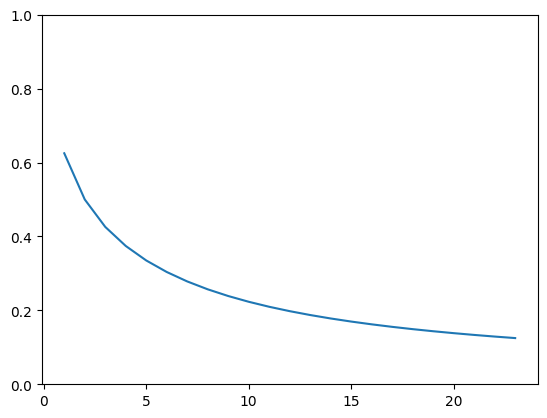

In [ ]:
n = 7
#plt.plot([i for i in range(1,n+1)],[time3(i)*2**(i/8) for i in range(1,n+1)])
plt.plot([i for i in range(1,n+1)],[time3(i) for i in range(1,n+1)])
plt.ylim(0,1)

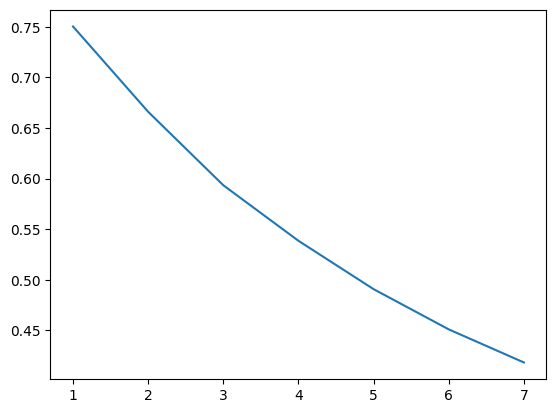

In [10]:
runs = 100_000
res = []
for n in range(1,8):
    ans = 0
    for i in range(runs):
        ans += (len(max(binary_string([int(random.random()//0.5) for _ in range(n)]).split("1"))) + 1)/(n+1)
    ans = ans/runs
    res.append(ans)
plt.plot([n for n in range(1,8)], res)